# Logistic Regression

Author: Varun Sundar

### Introduction

A particular case of discriminative approach (fit $p (y| \textbf{x} )$ directly, where **x** is the feature vector, y is the prediction) to building a probabilistic classifier, logisitic regression (despite the name being a misnomer), assumes parameters to be linear.

### Model Specification

Logistic regression corresponds to the following binary classification model:



$h \vec(x) = sign(\vec{w}^T*\vec(x) - threshold)$

often simplified to 

$h \vec(x) = sign(\vec{w}^T*\vec(x))$

using a bias.

Where $ h \vec(x)$ is the hypothesis function.

For instance, in image classification it goes as follows:


Call $g(z)= sigmoid(z)$

Notice that it is a bounded, one-one function.

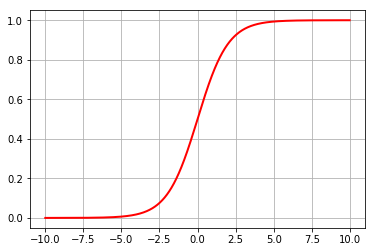

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1/(1+np.exp(-z))

x=np.arange(-10,10,0.010)

plt.plot(x,sigmoid(x),color='red',lw=2)
plt.grid()
plt.show()

The derivative of $g(z)$ is $$ \frac{dg}{dz}=g(z)(1-g(z))$$

### Cost Function

Just as in linear regression where the least squares cost function arose as a consequence (not entirely, one such derivation is the above), here also, maximum likelihood can be used to fit parameters.

Let us assume that
$$ P(y = 1 | x; \theta) = h_\theta(x) $$
$$ P(y = 0 | x; \theta) = 1 − h_\theta(x)$$

Or ineffect, 
$$ P(y | x; θ) = (h_\theta(x))^y (1 − h_\theta(x))^{1−y} $$

So, the likelihood (with Independently and Identically Distributed Random variable assumption, or IID)

$$ L(\theta) = P(\vec{y} | X; \theta)= \prod_{i=1}^m (h_\theta(x))^{y(i)} (1 − h_\theta(x))^{1−{y(i)}}  $$

which we want to maximise. 

In turn we may maximise,

$$\log(L(\theta))= \sum_{i=1}^m \log{(h_\theta(x))}{y(i)}+ \log{(1 − h_\theta(x))}{(1−{y(i)})}$$

In standard practise, to reframe this as a convex optimisation probelm (Ex: prove the above function is conave wrt theta vector), we take the negative of the log likelihood as the cost function.

To arrive at $$argmax_\theta   log(L(\theta)) $$,

We may use gardient ascent $$\theta:=\theta + \alpha*\nabla_\theta {J(\theta)} $$

Notice that,

$$ \frac {\partial l(\theta)}{\partial \theta_j} = (\frac{y}{g(\theta^T x)} - \frac {(1-y)}{(1-g(\theta^T x))} )* \frac {\partial g(\theta^T x)} {\partial \theta_j}$$

$$ = (\frac{y}{g(\theta^T x)} - \frac {(1-y)}{(1-g(\theta^T x))} )* g(\theta^T x)(1-g(\theta^T x)) * x_j$$

$$=  (y − h_\theta(x)) x_j $$


Implies,

$$\theta:=\theta + \alpha*(y − h_\theta(x)) x_j  $$

Which looks similar in form to the rule for linear regression.

To obtain the perceptron learning algorithm from the above, we may just threshold it by the sigma function at 0.

Also, instead of gradient descent, the generalised Newton-Raphlson method may be used.

 $$\theta:=\theta + H^{-1}*\nabla_\theta {J(\theta)} $$

Note that despite having faster convergence per iteration, it can be computationally costly, owing to the step of inverting the Hessian matrix. This method is also known as **Fischer scoring**.


### Implementation in Scikit

In [40]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data[:-1,:], iris.target[:-1]

In [43]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X,y)
print ('Predicted class %s, real class %s' % (
 logistic.predict(iris.data[-1,:]),iris.target[-1]))
print ('Probabilities for each class from 0 to 2: %s'
 % logistic.predict_proba(iris.data[-1,:]))

Predicted class [2], real class 2
Probabilities for each class from 0 to 2: [[ 0.00168787  0.28720074  0.71111138]]


/Users/Ankivarun/miniconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/Ankivarun/miniconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


### Implementing in Python Raw, example

#### Random Data

I shall choose a multivariate normal distribution to go about this, plot it and then run logistic regression on it.

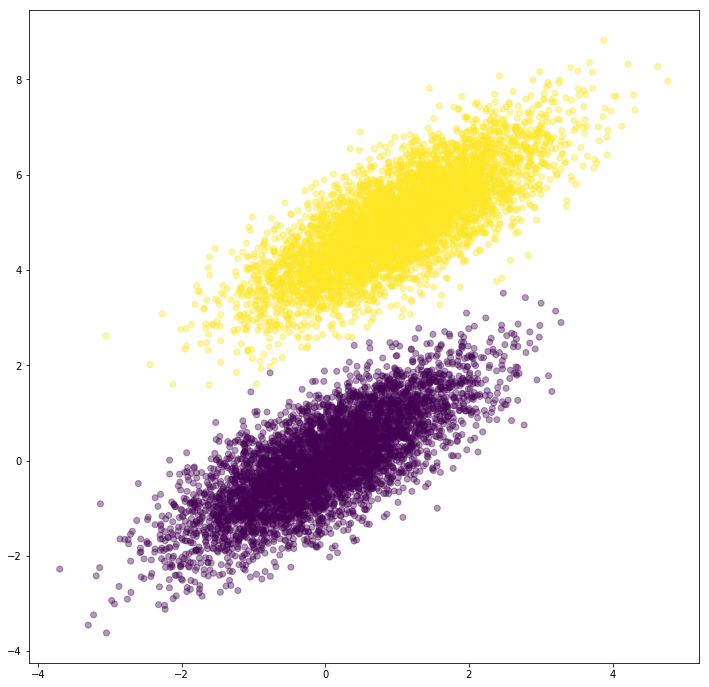

In [59]:
np.random.seed(10)
num_observations = 5000

#numpy.random.multivariate_normal(mean, cov[, size, check_valid, tol])

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 5], [[1, .78],[.75, 1]], num_observations)

simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))

plt.figure(figsize=(12,12))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = simulated_labels, alpha = .4)
plt.show()

Since the sigmoid function was already defined above, we can continue with the likelihood definition. The gradient can be done in-line, owing to its simplicity.

One apparent aspect is certainly the speed, which is terrible. Scikit's implementation is highly optimised and certainly advisable in practice.

In [60]:
def log_likelihood(features, target, weights): ## x is features, theta is weights
    scores = np.dot(features, weights)  ##theta^T x
    likelihood = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return likelihood

def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        # Print log-likelihood every 1000 steps
        if step % 10000 == 0:
            print (log_likelihood(features, target, weights))
        
    return weights

weights = logistic_regression(simulated_separableish_features, simulated_labels,
                     num_steps = 300000, learning_rate = 5e-5, add_intercept=True)

weights


-3998.81900443
-23.5309877516
-17.1770614174
-14.5269037733
-12.9842268935
-11.9427274266
-11.1774889491
-10.583569443
-10.104598614
-9.70723840557
-9.37033855207
-9.07974239698
-8.82556511211
-8.60066424819
-8.39973077754
-8.21872348452
-8.05450321516
-7.90458851753
-7.76698773522
-7.64008078293
-7.52253410072
-7.41323830466
-7.31126169798
-7.21581507865
-7.1262247319
-7.04191144547
-6.96237401947
-6.88717617369
-6.81593605338
-6.74831774398


array([-21.14270339,  -5.6457276 ,   9.6399825 ])

In [61]:
# Predictions

# appending intercept (bias) too to X (design) matrix
data = np.hstack((np.ones((simulated_separableish_features.shape[0], 1)),
                                 simulated_separableish_features))
final_scores = np.dot(data, weights)
preds = np.round(sigmoid(final_scores))

preds


array([ 0.,  0.,  0., ...,  1.,  1.,  1.])

Since, I havent partitioned data into a test set (Bad practice admittedly), and in additon, this was just to seperate the two classes linearly , for just viewing the algorithm's classification, we'll proceed with the training data.

The figure below shows the accuracy, with violet dots being accurate predictions and red dots incorrect.

In [62]:
# Accuracy on training set

print ('Accuracy : {0}'.format((preds == simulated_labels).sum().astype(float) / len(preds)))


Accuracy : 0.9998


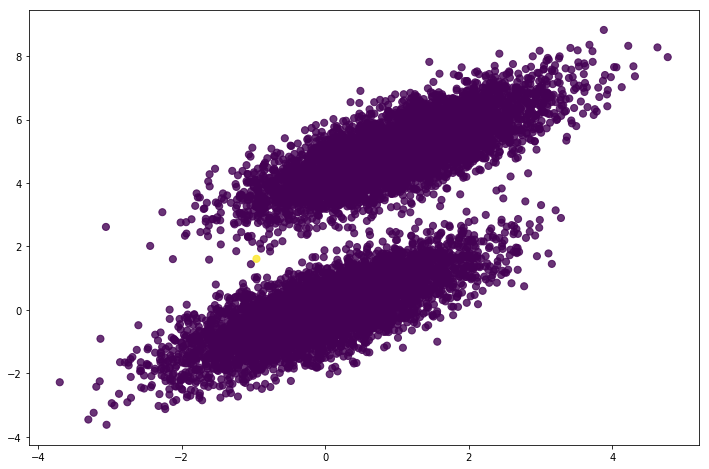

In [64]:
plt.figure(figsize = (12, 8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = preds == simulated_labels - 1, alpha = .8, s = 50)

plt.show()

# References

1. CS229, Stanford ML : http://cs229.stanford.edu/
2. CS231 N, Neural Networks for image recognition: http://cs231n.github.io/
3. Probabilistic Approach to Machine Learning, Murphy, 1st Ed.